# Question Two

| Lifetime (to nearest hour) | Frequency | Cum. Frequency |
| --- | --- | --- |
| 690-709 | 3 | 3 |
| 710-719 | 7 | 10 |
| 720-729 | 15 | 25 |
| 730-739 | 38 | 63 |
| 740-744 | 41 | 104 |
| 745-749 | 35 | 139 |
| 750-754 | 21 | 160 |
| 755-759 | 16 | 176 |
| 760-769 | 14 | 190 |
| 770-789 | 10 | 200 |

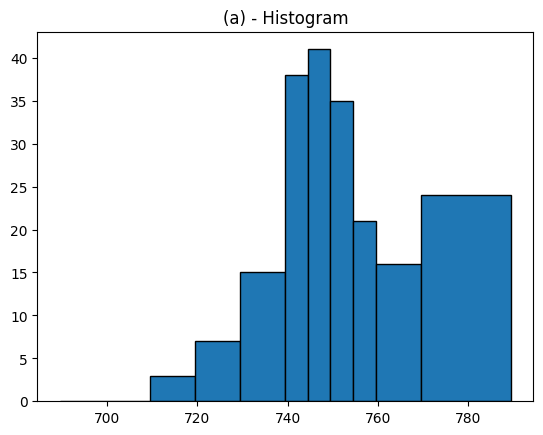

In [3]:
import matplotlib.pyplot as plt

intervals = [689.5, 709.5, 719.5, 729.5, 739.5, 744.5, 749.5, 754.5, 759.5, 769.5, 789.5]
freq = [3, 7, 15, 38, 41, 35, 21, 16, 14, 10]
cum_freq = [0, 3, 10, 25, 63, 104, 139, 160, 176, 190, 200]

# create raw dataset for plotting histogram
raw_data = []
index = 1
for item in freq:
    count = item
    while count != 0:
        raw_data.append(intervals[index])
        count = count - 1
    index = index + 1

plt.title("(a) - Histogram")
plt.hist(raw_data, bins=intervals, edgecolor='black')
plt.show()

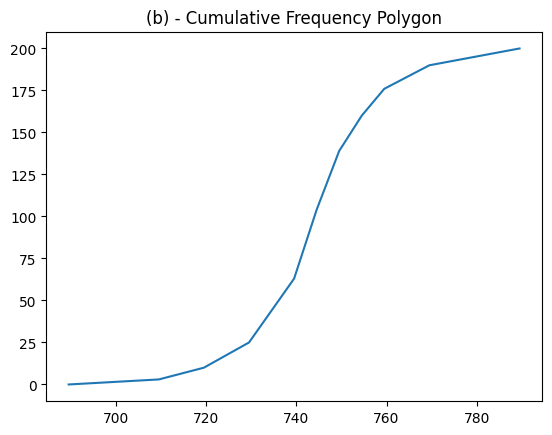

In [4]:
plt.plot(intervals, cum_freq)
plt.title("(b) - Cumulative Frequency Polygon")
plt.show()

In [10]:
import statistics

mean = statistics.mean(raw_data)
std = statistics.pstdev(raw_data)
print("mean = " + str(mean))
print("standard deviation = " + str(std))

mean = 748.15
standard deviation = 15.047508099349873


In [13]:
from scipy.interpolate import interp1d
import numpy as np

function = interp1d(intervals, cum_freq, kind='quadratic')
x = np.linspace(min(intervals), max(intervals), 100)
y = function(x)

x_list = x.tolist()
y_list = y.tolist()

for item in y_list:
    if item <= 100:
        median_index = y_list.index(item)
median = x_list[median_index]
print("median = " + str(median))

for item in y_list:
    if item <= 50:
        lower_index = y_list.index(item)
lower_quartile = x_list[lower_index]
print("lower quartile = " + str(lower_quartile))

for item in y_list:
    if item <= 150:
        upper_index = y_list.index(item)
upper_quartile = x_list[upper_index]
print("upper quartile = " + str(upper_quartile))

median = 743.0353535353536
lower quartile = 736.9747474747475
upper quartile = 751.1161616161617


In [14]:
skewness = (3 * (mean - median)) / std
print("Pearson's coefficient of skewness = " + str(skewness))

Pearson's coefficient of skewness = 1.0196996933068359


In [17]:
q_skewness = (upper_quartile - (2 * median) + lower_quartile) / (upper_quartile - lower_quartile)
print("Quartile coefficient of skewness = " + str(q_skewness))

Quartile coefficient of skewness = 0.14285714285713827


<Axes: >

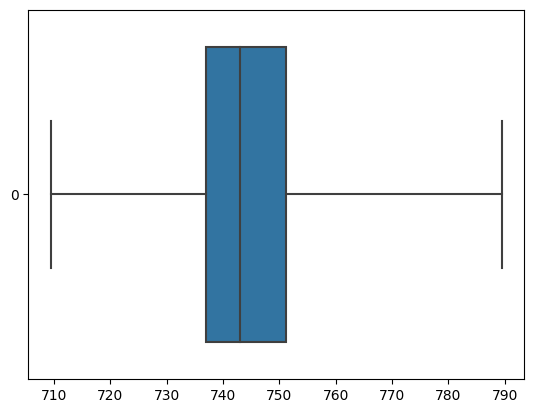

In [20]:
import seaborn as sns

sns.boxplot([min(raw_data), lower_quartile, median, upper_quartile, max(raw_data)], orient='h', whis=max(raw_data))